In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
import warnings
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel (r'C:\Users\COMP\Desktop\food_train.xlsx')#training dataset  
df_test=pd.read_excel(r'C:\Users\COMP\Desktop\food_test.xlsx')#testing dataset
food_df=df.append(df_test)

In [3]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [4]:
df_test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [5]:
food_df.head()

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES
0,Thane,1200.0,"Malwani, Goan, North Indian",Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49 votes
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30 votes
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221 votes
3,Mumbai,800.0,"Tibetan, Chinese",Bandra West,4.1,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24 votes
4,Mumbai,300.0,Desserts,Lower Parel,3.8,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,165 votes


In [6]:
food_df.nunique()

CITY               450
COST                86
CUISINES          5183
LOCALITY          1636
RATING              32
RESTAURANT_ID    15574
TIME              3295
TITLE              123
VOTES             2075
dtype: int64

In [7]:
food_df.dtypes

CITY              object
COST             float64
CUISINES          object
LOCALITY          object
RATING            object
RESTAURANT_ID      int64
TIME              object
TITLE             object
VOTES             object
dtype: object

In [8]:
pd.crosstab(food_df['RATING'],food_df["TITLE"])

TITLE,BAKERY,"BAKERY,BEVERAGE SHOP","BAKERY,CAFÉ","BAKERY,CASUAL DINING","BAKERY,CONFECTIONERY","BAKERY,DESSERT PARLOR","BAKERY,FOOD COURT","BAKERY,QUICK BITES","BAKERY,SWEET SHOP",BAR,...,"QUICK BITES,KIOSK","QUICK BITES,MEAT SHOP","QUICK BITES,SWEET SHOP",SWEET SHOP,"SWEET SHOP,BAKERY","SWEET SHOP,BEVERAGE SHOP","SWEET SHOP,CASUAL DINING","SWEET SHOP,CONFECTIONERY","SWEET SHOP,DESSERT PARLOR","SWEET SHOP,QUICK BITES"
RATING,,,,,,,,,,,,,,,,,,,,,
-,57,0,1,1,0,0,0,8,0,3,...,0,0,0,0,1,0,0,0,0,0
2.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.5,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2.6,1,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2.7,2,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [9]:
df.describe()

,RESTAURANT_ID,COST
count,12690.000000,12690.000000
mean,7759.134121,655.252246
std,4504.874150,627.003540
min,0.000000,20.000000
25%,3863.250000,300.000000
50%,7740.000000,500.000000
75%,11688.750000,800.000000
max,15573.000000,14000.000000


In [10]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [11]:
food_df.isnull().sum()

CITY              147
COST             4231
CUISINES            0
LOCALITY          128
RATING              4
RESTAURANT_ID       0
TIME                0
TITLE               0
VOTES            1606
dtype: int64

In [12]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(food_df['RATING'],food_df['COST']))

(5661.148120113025,
 2.7157097622743822e-222,
 2635,
 array([[3.90132409e-02, 3.12105927e-01, 7.80264817e-02, ...,
         3.90132409e-02, 3.90132409e-02, 3.90132409e-02],
        [1.57629256e-04, 1.26103405e-03, 3.15258512e-04, ...,
         1.57629256e-04, 1.57629256e-04, 1.57629256e-04],
        [2.36443884e-04, 1.89155107e-03, 4.72887768e-04, ...,
         2.36443884e-04, 2.36443884e-04, 2.36443884e-04],
        ...,
        [2.52206810e-03, 2.01765448e-02, 5.04413619e-03, ...,
         2.52206810e-03, 2.52206810e-03, 2.52206810e-03],
        [1.73392182e-03, 1.38713745e-02, 3.46784363e-03, ...,
         1.73392182e-03, 1.73392182e-03, 1.73392182e-03],
        [5.57219420e-02, 4.45775536e-01, 1.11443884e-01, ...,
         5.57219420e-02, 5.57219420e-02, 5.57219420e-02]]))

In [13]:
#lets fill null values
cols = ["CITY","VOTES","LOCALITY","RATING","COST"]

food_df[cols]=food_df[cols].fillna(food_df.mode().iloc[0])

In [14]:
#lets simplify the data so that we can later convert it into numerical data
food_df['cusine_1'] = food_df['CUISINES'].str.split(',').str[0]
food_df['cusine_2'] = food_df['CUISINES'].str.split(',').str[1]
food_df['cusine_3'] = food_df['CUISINES'].str.split(',').str[2]
food_df['cusine_4'] = food_df['CUISINES'].str.split(',').str[3]
food_df['cusine_1'].fillna("0",inplace = True)
food_df['cusine_2'].fillna("0",inplace = True)
food_df['cusine_3'].fillna("0",inplace = True)
food_df['cusine_4'].fillna("0",inplace = True)

In [15]:
food_df['VOTES'] = food_df['VOTES'].str.slice(stop=2).astype(int)

In [16]:
food_df['title_1'] = food_df['TITLE'].str.split(',').str[0]
food_df['title_2'] = food_df['TITLE'].str.split(',').str[1]
food_df['title_1'].fillna("0",inplace = True)
food_df['title_2'].fillna("0",inplace = True)

In [17]:
food_df

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES,cusine_1,cusine_2,cusine_3,cusine_4,title_1,title_2
0,Thane,1200.0,"Malwani, Goan, North Indian",Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49,Malwani,Goan,North Indian,0,CASUAL DINING,0
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30,Asian,Modern Indian,Japanese,0,CASUAL DINING,BAR
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,22,North Indian,Chinese,Biryani,Hyderabadi,CASUAL DINING,0
3,Mumbai,800.0,"Tibetan, Chinese",Bandra West,4.1,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24,Tibetan,Chinese,0,0,QUICK BITES,0
4,Mumbai,300.0,Desserts,Lower Parel,3.8,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,16,Desserts,0,0,0,DESSERT PARLOR,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,New Delhi,300.0,"North Indian, Mughlai, Chinese",Punjabi Bagh,3.9,9057,11:30am – 11:30pm (Mon-Sun),CASUAL DINING,28,North Indian,Mughlai,Chinese,0,CASUAL DINING,0
4227,Bangalore,300.0,"Biryani, North Indian, Sandwich, Salad, Wraps",HSR Layout,4.3,1247,11am – 1am (Mon-Sun),None,46,Biryani,North Indian,Sandwich,Salad,None,0
4228,Faridabad,300.0,"Continental, North Indian",Sector 86,3.7,8617,9:30am – 10:30pm (Mon-Sun),QUICK BITES,53,Continental,North Indian,0,0,QUICK BITES,0
4229,Kochi,300.0,"Rolls, Beverages",Kochi,-,6485,"11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",QUICK BITES,44,Rolls,Beverages,0,0,QUICK BITES,0


In [18]:
food_df['RATING']=food_df['RATING'].str.extract('(\d+)').astype(float)

In [19]:
food_df

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES,cusine_1,cusine_2,cusine_3,cusine_4,title_1,title_2
0,Thane,1200.0,"Malwani, Goan, North Indian",Dombivali East,3.0,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49,Malwani,Goan,North Indian,0,CASUAL DINING,0
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",Ramapuram,4.0,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30,Asian,Modern Indian,Japanese,0,CASUAL DINING,BAR
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",Saligramam,3.0,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,22,North Indian,Chinese,Biryani,Hyderabadi,CASUAL DINING,0
3,Mumbai,800.0,"Tibetan, Chinese",Bandra West,4.0,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24,Tibetan,Chinese,0,0,QUICK BITES,0
4,Mumbai,300.0,Desserts,Lower Parel,3.0,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,16,Desserts,0,0,0,DESSERT PARLOR,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,New Delhi,300.0,"North Indian, Mughlai, Chinese",Punjabi Bagh,3.0,9057,11:30am – 11:30pm (Mon-Sun),CASUAL DINING,28,North Indian,Mughlai,Chinese,0,CASUAL DINING,0
4227,Bangalore,300.0,"Biryani, North Indian, Sandwich, Salad, Wraps",HSR Layout,4.0,1247,11am – 1am (Mon-Sun),None,46,Biryani,North Indian,Sandwich,Salad,None,0
4228,Faridabad,300.0,"Continental, North Indian",Sector 86,3.0,8617,9:30am – 10:30pm (Mon-Sun),QUICK BITES,53,Continental,North Indian,0,0,QUICK BITES,0
4229,Kochi,300.0,"Rolls, Beverages",Kochi,NaN,6485,"11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",QUICK BITES,44,Rolls,Beverages,0,0,QUICK BITES,0


In [20]:
food_df.shape

(16921, 15)

In [21]:
df.shape

(12690, 9)

In [22]:
food_df.drop(['TITLE','CUISINES','TIME'],axis=1,inplace=True)

df_train = food_df[0:12690]
df_test = food_df[12690:]
df_test = df_test.drop(['COST'], axis =1)

In [23]:
food_df.shape

(16921, 12)

In [24]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
df_test["cusine_1_code"] = lb.fit_transform(df_test["cusine_1"])
df_test["cusine_2_code"] = lb.fit_transform(df_test["cusine_2"])
df_test["cusine_3_code"] = lb.fit_transform(df_test["cusine_3"])
df_test["cusine_4_code"] = lb.fit_transform(df_test["cusine_4"])

df_test["title_1_code"] = lb.fit_transform(df_test["title_1"])
df_test["title_2_code"] = lb.fit_transform(df_test["title_2"])
df_test["locality_code"] = lb.fit_transform(df_test["LOCALITY"])
df_test["city_code"] = lb.fit_transform(df_test["CITY"])

In [25]:
df_test

,CITY,LOCALITY,RATING,RESTAURANT_ID,VOTES,cusine_1,cusine_2,cusine_3,cusine_4,title_1,title_2,cusine_1_code,cusine_2_code,cusine_3_code,cusine_4_code,title_1_code,title_2_code,locality_code,city_code
0,Noida,Sector 18,4.0,4085,56,North Indian,Chinese,Mughlai,Kebab,CASUAL DINING,0,60,19,56,33,5,0,662,110
1,Mumbai,Grant Road,4.0,12680,61,South Indian,Fast Food,Pizza,North Indian,QUICK BITES,0,73,24,61,49,22,0,221,96
2,Mumbai,Marine Lines,3.0,1411,35,North Indian,Seafood,Biryani,Chinese,CASUAL DINING,0,60,69,13,15,5,0,411,96
3,Faridabad,NIT,3.0,204,14,Biryani,0,0,0,None,0,12,81,80,68,19,0,456,41
4,Kochi,Kaloor,3.0,13453,23,South Indian,Kerala,0,0,QUICK BITES,0,73,42,80,68,22,0,300,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,New Delhi,Punjabi Bagh,3.0,9057,28,North Indian,Mughlai,Chinese,0,CASUAL DINING,0,60,57,19,68,5,0,597,108
4227,Bangalore,HSR Layout,4.0,1247,46,Biryani,North Indian,Sandwich,Salad,None,0,12,59,65,53,19,0,237,9
4228,Faridabad,Sector 86,3.0,8617,53,Continental,North Indian,0,0,QUICK BITES,0,22,59,80,68,22,0,696,41
4229,Kochi,Kochi,NaN,6485,44,Rolls,Beverages,0,0,QUICK BITES,0,67,10,80,68,22,0,332,78


In [26]:
#transfering from training to testing dataset

In [27]:
df_test_merge_1 = df_test[['cusine_1','cusine_1_code']].drop_duplicates()
df_test_merge_2 = df_test[['cusine_2','cusine_2_code']].drop_duplicates()
df_test_merge_3 = df_test[['cusine_3','cusine_3_code']].drop_duplicates()
df_test_merge_4 = df_test[['cusine_4','cusine_4_code']].drop_duplicates()
df_test_merge_5 = df_test[['title_1','title_1_code']].drop_duplicates()
df_test_merge_6 = df_test[['title_2','title_2_code']].drop_duplicates()
df_test_merge_7 = df_test[['LOCALITY','locality_code']].drop_duplicates()
df_test_merge_8 = df_test[['CITY','city_code']].drop_duplicates()

In [28]:
df_train = pd.merge(df_train,df_test_merge_1[['cusine_1','cusine_1_code']],on='cusine_1', how='left')
df_train = pd.merge(df_train,df_test_merge_2[['cusine_2','cusine_2_code']],on='cusine_2', how='left')
df_train = pd.merge(df_train,df_test_merge_3[['cusine_3','cusine_3_code']],on='cusine_3', how='left')
df_train = pd.merge(df_train,df_test_merge_4[['cusine_4','cusine_4_code']],on='cusine_4', how='left')
df_train = pd.merge(df_train,df_test_merge_5[['title_1','title_1_code']],on='title_1', how='left')
df_train = pd.merge(df_train,df_test_merge_6[['title_2','title_2_code']],on='title_2', how='left')
df_train = pd.merge(df_train,df_test_merge_7[['LOCALITY','locality_code']],on='LOCALITY', how='left')
df_train = pd.merge(df_train,df_test_merge_8[['CITY','city_code']],on='CITY', how='left')

In [29]:
df_train.head()

,CITY,COST,LOCALITY,RATING,RESTAURANT_ID,VOTES,cusine_1,cusine_2,cusine_3,cusine_4,title_1,title_2,cusine_1_code,cusine_2_code,cusine_3_code,cusine_4_code,title_1_code,title_2_code,locality_code,city_code
0,Thane,1200.0,Dombivali East,3.0,9438,49,Malwani,Goan,North Indian,0,CASUAL DINING,0,49.0,27.0,58.0,68.0,5.0,0.0,161.0,134.0
1,Chennai,1500.0,Ramapuram,4.0,13198,30,Asian,Modern Indian,Japanese,0,CASUAL DINING,BAR,4.0,55.0,39.0,68.0,5.0,2.0,614.0,18.0
2,Chennai,800.0,Saligramam,3.0,10915,22,North Indian,Chinese,Biryani,Hyderabadi,CASUAL DINING,0,60.0,19.0,13.0,26.0,5.0,0.0,638.0,18.0
3,Mumbai,800.0,Bandra West,4.0,6346,24,Tibetan,Chinese,0,0,QUICK BITES,0,80.0,19.0,80.0,68.0,22.0,0.0,74.0,96.0
4,Mumbai,300.0,Lower Parel,3.0,15387,16,Desserts,0,0,0,DESSERT PARLOR,0,23.0,81.0,80.0,68.0,9.0,0.0,375.0,96.0


In [30]:
df_train.isnull().sum()

CITY                0
COST                0
LOCALITY            0
RATING           1202
RESTAURANT_ID       0
VOTES               0
cusine_1            0
cusine_2            0
cusine_3            0
cusine_4            0
title_1             0
title_2             0
cusine_1_code      51
cusine_2_code      43
cusine_3_code      39
cusine_4_code      52
title_1_code        3
title_2_code        8
locality_code    1146
city_code         348
dtype: int64

In [31]:

cols=["cusine_1_code","cusine_2_code","cusine_3_code","cusine_4_code","title_1_code","title_2_code","title_2_code","city_code","locality_code","RATING"]
df_train[cols]=df_train[cols].fillna(df_train.mean().iloc[0])




In [32]:
df_lg = df_train[["cusine_1_code","cusine_2_code","cusine_3_code","cusine_4_code","title_1_code","title_2_code","locality_code","city_code","RATING","VOTES","COST","RESTAURANT_ID"]]
x = df_lg.drop(['COST'], axis=1)
y = df_lg.COST

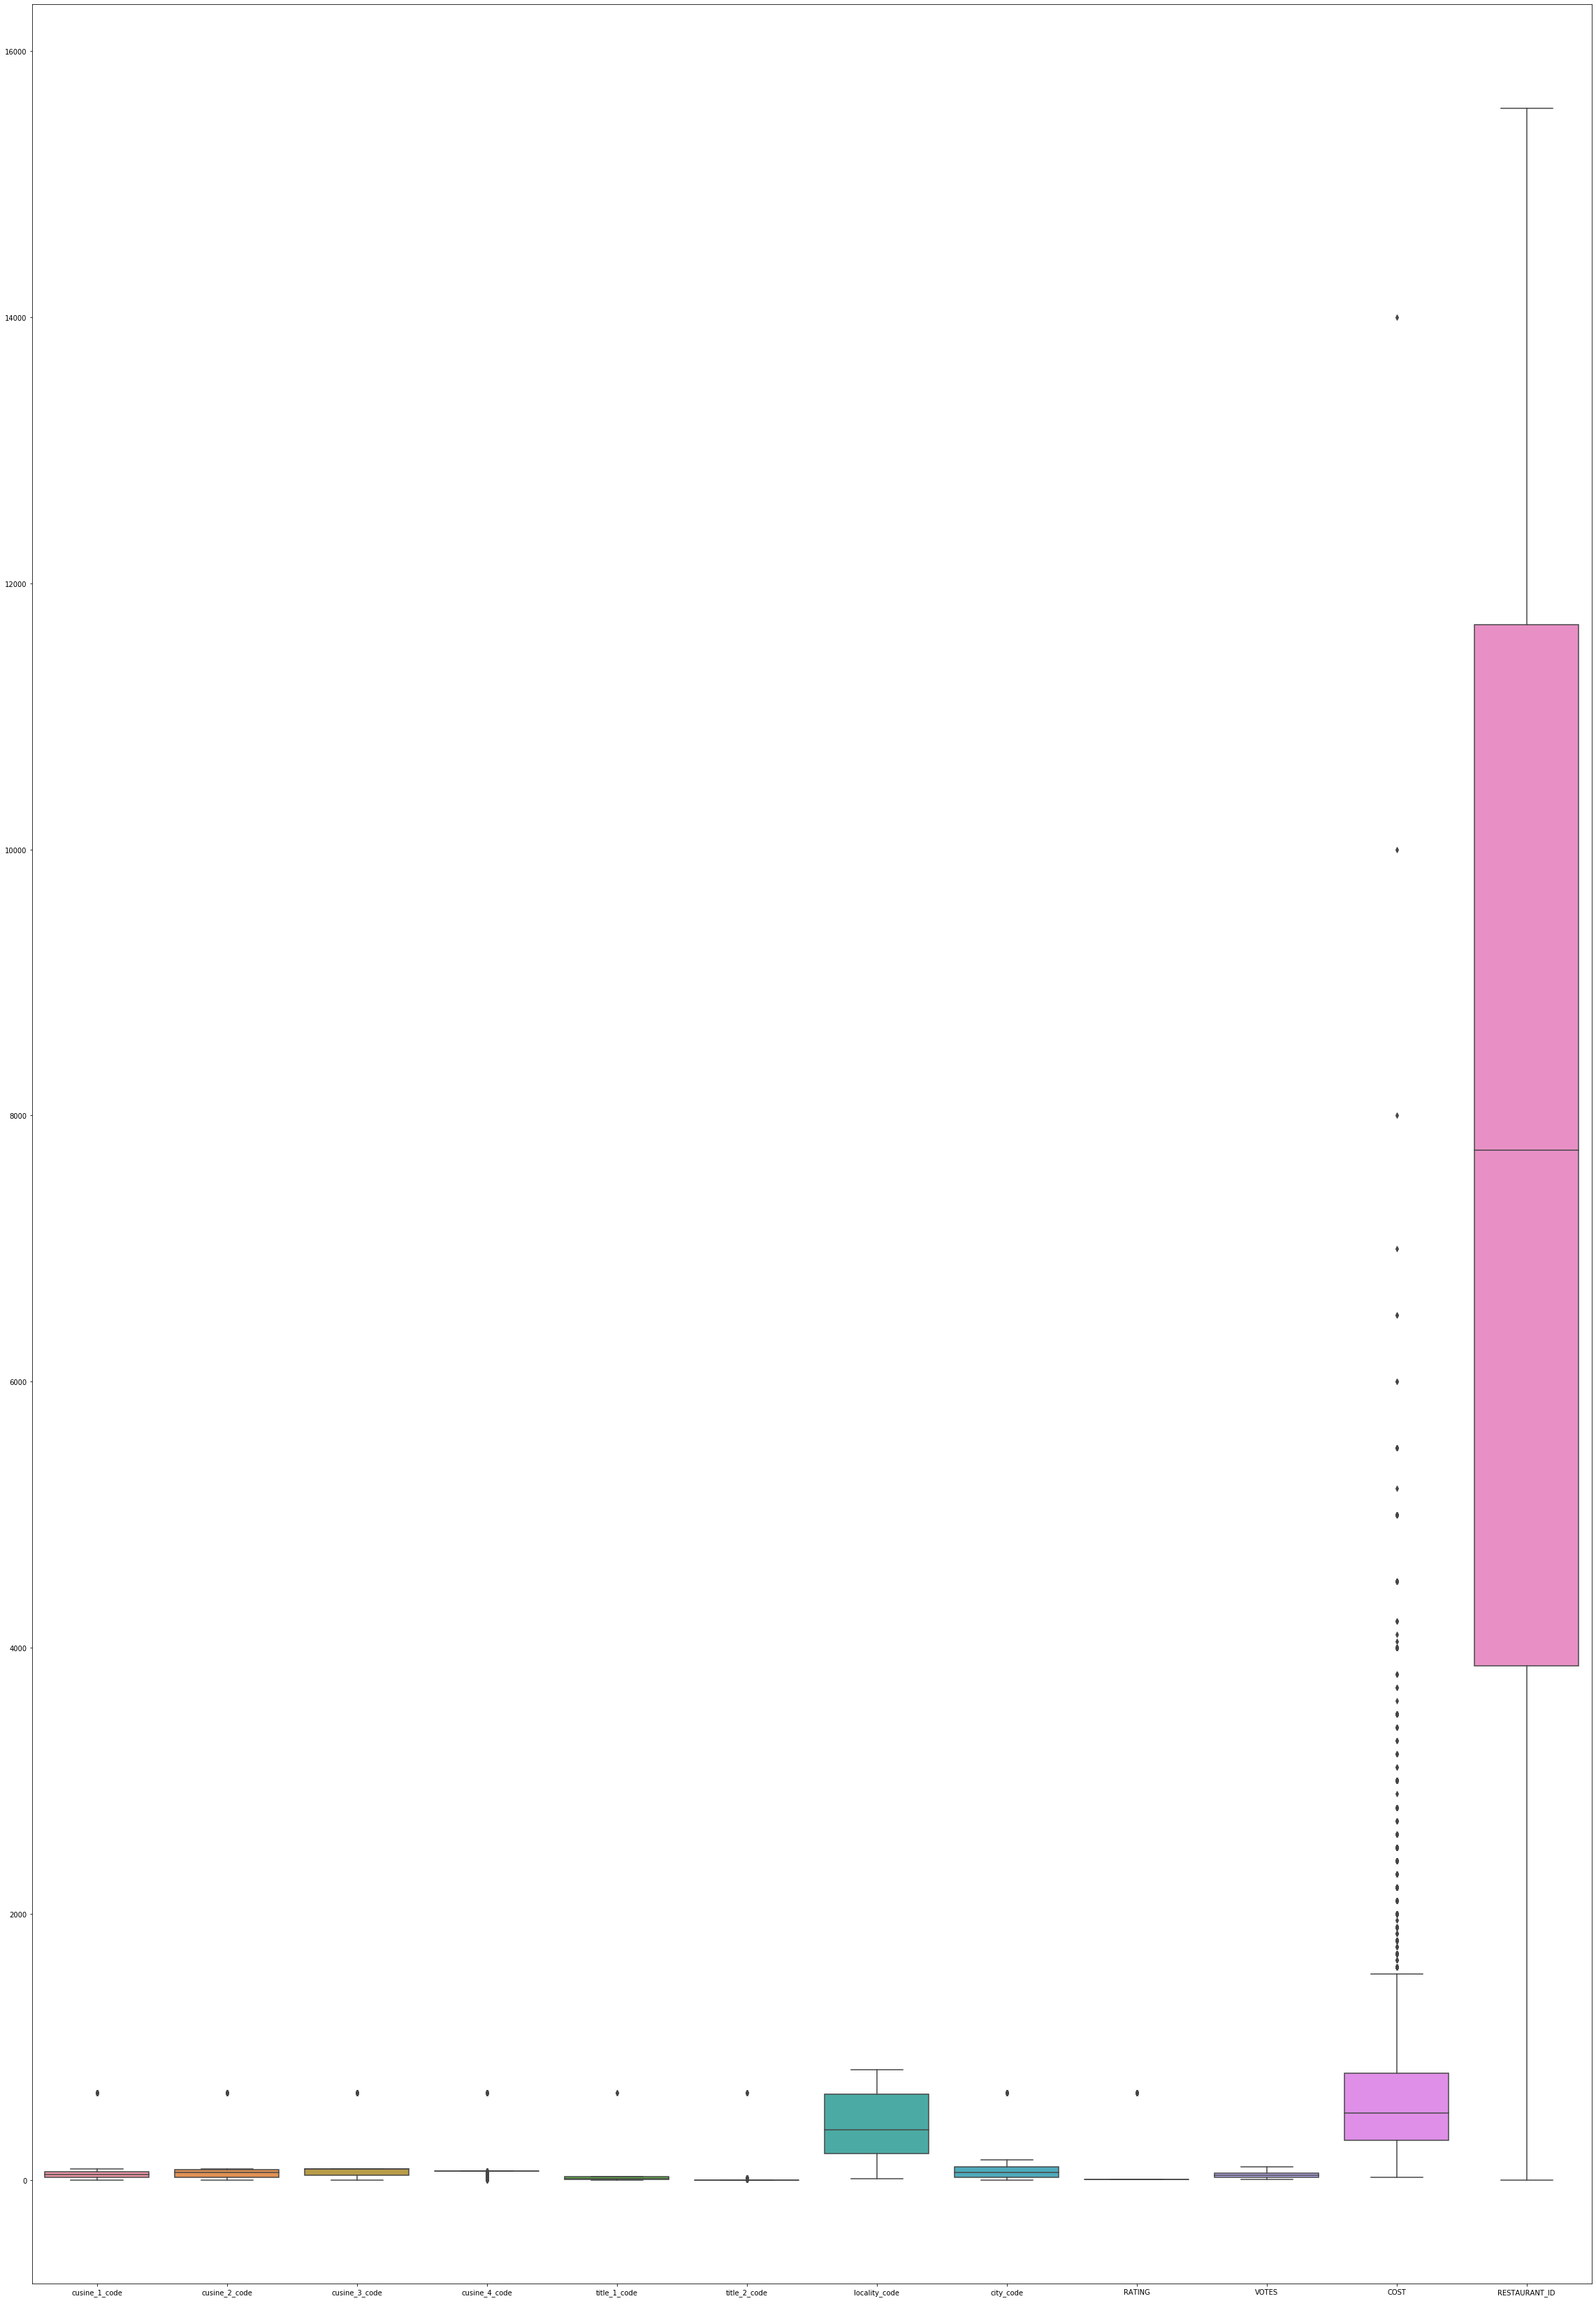

In [33]:
plt.figure(figsize = (40,60))
sns.boxplot(data=df_lg)
#outliers present

In [34]:
#outliers present mainly in cost column lets fix it
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df_lg))
print(z)

[[0.13571651 0.50197797 0.09104694 ... 0.44801891 0.86884552 0.37269233]
 [0.8542533  0.1279569  0.54187049 ... 0.35766328 1.34733058 1.20737672]
 [0.37770913 0.68195936 1.15878693 ... 0.69689788 0.23086546 0.70057234]
 ...
 [0.34826873 0.63696402 1.34860737 ... 0.91446649 1.02834054 0.74896628]
 [0.37770913 0.46542201 1.0164216  ... 0.27285463 0.40711461 0.36076439]
 [0.37770913 0.68195936 0.43095927 ... 1.21129677 0.08812458 0.29505519]]


In [35]:
threshold=3
print(np.where(z>3))

(array([   13,    18,    35, ..., 12658, 12660, 12668], dtype=int64), array([ 8,  7,  1, ...,  8,  8, 10], dtype=int64))


In [36]:
df_lg = df_lg[(z < 3).all(axis=1)]

In [37]:
df_lg.shape

(10795, 12)

In [38]:
df_lg.head()

,cusine_1_code,cusine_2_code,cusine_3_code,cusine_4_code,title_1_code,title_2_code,locality_code,city_code,RATING,VOTES,COST,RESTAURANT_ID
0,49.0,27.0,58.0,68.0,5.0,0.0,161.0,134.0,3.0,49,1200.0,9438
1,4.0,55.0,39.0,68.0,5.0,2.0,614.0,18.0,4.0,30,1500.0,13198
2,60.0,19.0,13.0,26.0,5.0,0.0,638.0,18.0,3.0,22,800.0,10915
3,80.0,19.0,80.0,68.0,22.0,0.0,74.0,96.0,4.0,24,800.0,6346
4,23.0,81.0,80.0,68.0,9.0,0.0,375.0,96.0,3.0,16,300.0,15387


In [39]:
df_lg.corr()

,cusine_1_code,cusine_2_code,cusine_3_code,cusine_4_code,title_1_code,title_2_code,locality_code,city_code,RATING,VOTES,COST,RESTAURANT_ID
cusine_1_code,1.000000,0.033352,-0.022478,0.041000,0.216260,-0.125183,0.029522,0.023877,-0.092353,-0.004579,-0.063681,0.048901
cusine_2_code,0.033352,1.000000,0.228328,0.142327,0.144658,-0.090555,0.025391,0.004970,-0.060200,-0.011722,-0.099552,0.013564
cusine_3_code,-0.022478,0.228328,1.000000,0.386349,0.176573,-0.074614,0.015606,-0.011890,-0.085198,-0.010949,-0.221422,-0.019036
cusine_4_code,0.041000,0.142327,0.386349,1.000000,0.151656,-0.070390,0.017882,-0.002023,-0.125587,-0.006687,-0.224040,0.003238
title_1_code,0.216260,0.144658,0.176573,0.151656,1.000000,-0.139605,0.037084,-0.035384,-0.168296,-0.010321,-0.386679,0.003087
title_2_code,-0.125183,-0.090555,-0.074614,-0.070390,-0.139605,1.000000,-0.005407,0.016782,0.080465,0.015910,0.102060,-0.015975
locality_code,0.029522,0.025391,0.015606,0.017882,0.037084,-0.005407,1.000000,0.042570,-0.034202,0.001994,-0.025808,-0.013520
city_code,0.023877,0.004970,-0.011890,-0.002023,-0.035384,0.016782,0.042570,1.000000,0.039566,0.005106,0.060748,0.009166
RATING,-0.092353,-0.060200,-0.085198,-0.125587,-0.168296,0.080465,-0.034202,0.039566,1.000000,0.029990,0.326369,0.030425
VOTES,-0.004579,-0.011722,-0.010949,-0.006687,-0.010321,0.015910,0.001994,0.005106,0.029990,1.000000,0.029137,0.011253


In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.18, random_state=123)


In [41]:
from sklearn.decomposition import PCA
pca_new = PCA(n_components=8)
x = pca_new.fit_transform(x)


In [42]:
lg=LinearRegression()
lg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
lg.score(x_train,y_train)

0.05509270866135085

In [44]:
lg.score(x_test,y_test)

0.07754289720658036

In [45]:
pred=lg.predict(x_test)
print("Predicted FOOD COST:",pred)
print("actual FOOD COST",y_test)

Predicted FOOD COST: [505.03307232 210.28286494 770.4621412  ... 711.18684137 643.23749481
 754.559192  ]
actual FOOD COST 3453      800.0
11810    2000.0
9359      700.0
6290      650.0
12598     800.0
          ...  
2022      800.0
276       500.0
2786      700.0
3138      500.0
643       500.0
Name: COST, Length: 2285, dtype: float64


In [46]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(x,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [47]:
forest_scores = cross_val_score(forest_reg,x,y,
                               scoring="neg_mean_squared_error", cv=10)

In [48]:
forest_rmse_scores = np.sqrt(-forest_scores)

In [49]:
print("Mean:\t\t ", forest_rmse_scores.mean(), "\nStandard Deviation:", forest_rmse_scores.std())

Mean:		  593.45440432887 
Standard Deviation: 47.03670488862262


In [50]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None, n_estimators=30)
forest_reg.fit(x,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [51]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [52]:
r2_score(tree_reg.predict(x_test),y_test)

0.4522598539525201

In [53]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso()
ls.fit(x_train,y_train)
print(ls.score(x_train,y_train))

0.05509267682188368


In [54]:
from sklearn.externals import joblib
joblib.dump(tree_reg,'tree_regfood.obj')
tree_reg_from_joblib=joblib.load('tree_regfood.obj')